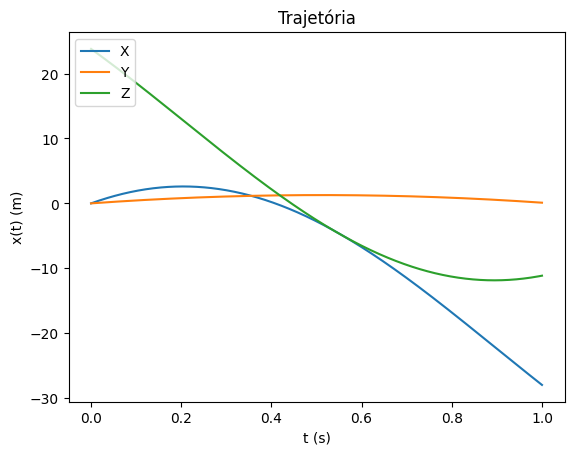

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#bola a ser chutada do canto, ver se é golo ou não

# Valores dados
m = 0.45
r = 0.11
A = np.pi * r**2
p_ar = 1.225
w = np.array([0, 400, 0])

# Parâmetros
dt = 0.001
t0 = 0
tf = 1
x0 = np.array([0, 0, 23.8])
v0 = np.array([25, 5, -50])

# Esta função calcula a aceleração a partir da velocidade atual
def accel(v):
    # Cálculo da força de Magnus, np.cross calcula o produto
    # vetorial de dois vetores.
    F_magnus = 1/2 * A * p_ar * r * np.cross(w, v)
    # Finalmente a aceleração é a soma da aceleração gravítica
    # e a soma da aceleração da força de Magnus
    return np.array([0, -g, 0]) + F_magnus/m

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# Agora lidamos com movimento tridimensional, logo precisamos de mais um
# elemento para os vetores das quantidades.
shape = (n + 1, 3)

t = np.zeros(n + 1)
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = accel(v0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt
# Este gráfico irá apresentar cada um dos componentes da
# posição ao longo do tempo.
plt.plot(t, x[:, 0], label="X")
plt.plot(t, x[:, 1], label="Y")
plt.plot(t, x[:, 2], label="Z")
plt.xlabel("t (s)")
plt.ylabel("x(t) (m)")
plt.legend(loc="upper left")
plt.title("Trajetória")
plt.show()



In [6]:
for i in range(n):
    if x[i, 0] * x[i + 1, 0] < 0:
        idx = i
        break

xCross = x[idx]
tCross = t[idx]